# Netflix Top Ten

## Overview

This project analyzes box office and streaming data to provide strategic direction for a newly formed movie division. Our analysis explores financial data, film ratings, and viewership data to help guide the division in deciding what types of movies to create.

## Notebook Overview

Other analyses in this repository focus on box office data. However, due to the COVID-19 pandemic, this analysis does not take into account most recent trends in viewership. Because we cannot accurately rely on box office data for 2020 and 2021, we will need to instead look for data from a different source--streaming. Most streaming services do not release comprehensive ratings for their programming, but we can use data gathered from Netflix's "Top Ten" feature to get a glimpse into the most recent viewership trends ([read more about the Netflix Top Ten feature](https://about.netflix.com/en/news/see-whats-popular-on-netflix)).

Netflix Top Ten data was collected from [The Numbers](the-numbers.com) and aggregates all titles that have appeared in the Netflix Top Ten from January 1st to May 31st 2021. Additional details about these titles was collected from [TMDB](https://www.themoviedb.org/).

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set_style('darkgrid')
%matplotlib inline

#import dataset
df = pd.read_csv('data/Edited Data/Netflix Top Ten with Info.csv', converters={'genre_ids': eval})
genres = pd.read_csv('data/edited data/tmdb genres.csv')

In [2]:
#prepare table for plotting
#assemble only columns relevant to the visualization
movie_genres = df.loc[:, ['Title', 'genre_ids', 'Viewership Score']]

#expand list of genre ids
movie_genres = movie_genres.explode('genre_ids')

#merge in genre names
graph = movie_genres.merge(genres, left_on='genre_ids', right_on='id')

## Plotting Genres

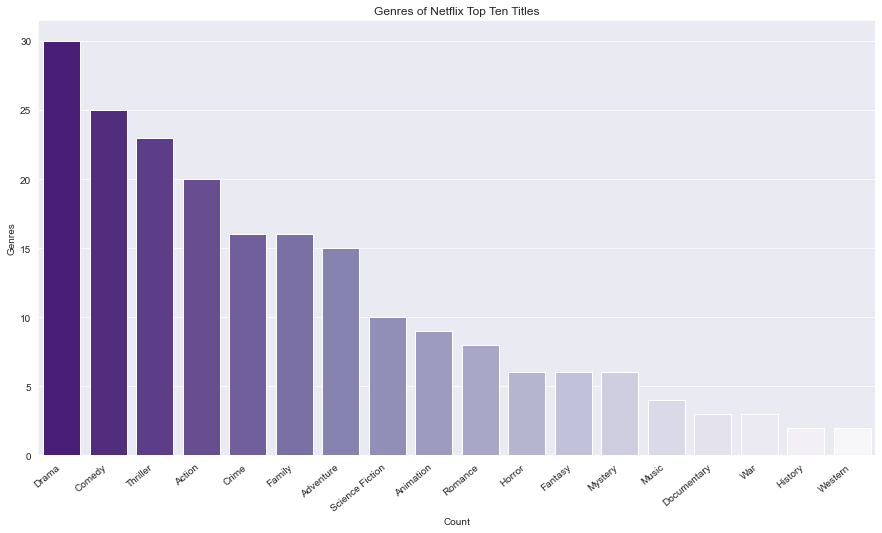

In [3]:
#create plot
fig = plt.figure(figsize=(15,8))
ax1 = sns.countplot(data=graph, x='name', order = graph['name'].value_counts().index, palette = 'Purples_r')
ax1.set(xlabel='Count', ylabel='Genres', title='Genres of Netflix Top Ten Titles')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right");

We can see from this graph that dramas are the most popular genre, followed by comedy and thriller. Let's examine these genres to see if we can find some commonalities.

## Dramas

Let's start by creating a table to look at details about our drama movies.

In [4]:
dramas = movie_genres.loc[movie_genres['genre_ids'] == 18]
drama_details = dramas.merge(df, on='Title')
drama_details.drop(columns=['genre_ids_x', 'Viewership Score_y', 'id', 'Type', 'title'], inplace=True)
drama_details.head()

,Title,Viewership Score_x,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date,Netflix Release Date,Days in Top Ten
0,Deadly Illusions,82,"[18, 53]",en,"A bestselling female novelist, suffering from ...",44.376,5.0,186,2021-03-18,18-Mar-21,10
1,The Midnight Sky,82,"[878, 18]",en,A lone scientist in the Arctic races to contac...,19.593,5.9,1269,2020-12-10,23-Dec-20,10
2,Stowaway,70,"[18, 878, 53]",en,A three-person crew on a mission to Mars faces...,135.837,6.1,576,2021-04-22,22-Apr-21,9
3,Synchronic,64,"[878, 18, 53, 27]",en,Two New Orleans paramedics' lives are ripped a...,17.374,6.4,263,2020-10-23,16-Apr-21,9
4,Concrete Cowboy,60,"[18, 37]",en,Sent to live with his estranged father for the...,34.491,6.2,83,2020-09-10,2-Apr-21,10


We can create a word cloud using the overviews for each movie to get an idea of similarities.

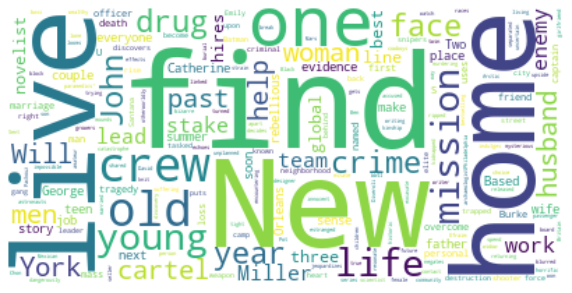

In [5]:
drama_text = " ".join(overview for overview in drama_details['overview'])
drama_wordcloud = WordCloud(background_color="white").generate(drama_text)
plt.figure(figsize=(10,10))
plt.imshow(drama_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see quite a few drug/crime related words (cartel, drug, officer, crime, evidence) as well as words describing family relationships (husband, father, couple).

Next, let's look at what genres co-occur with drama.

In [6]:
#define a function that counts the frequency of genres in the genre_id column
def genre_count(series):
    g = []
    genres = {}
    for i in series:
        g.extend(i)
    x = list(set(g))
    for i in x:
        genres[i] = 0
    for i in g:
        genres[i] += 1
    df = pd.DataFrame.from_dict(genres, orient='index')
    df.sort_values(by=0, inplace=True, ascending=False)
    return df

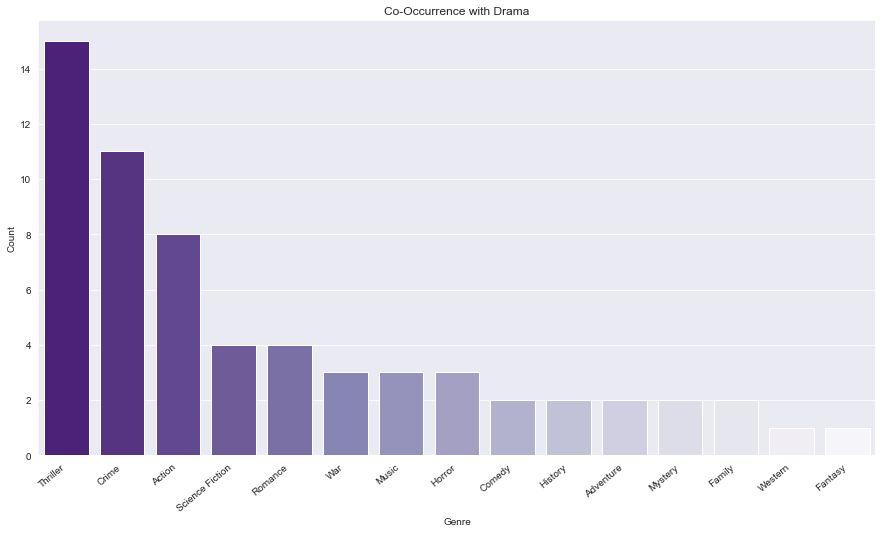

In [7]:
drama_chart = genre_count(drama_details['genre_ids_y'], )
drama_chart = drama_chart.drop(18)
drama_chart = drama_chart.merge(genres, left_index=True, right_on='id')
fig = plt.figure(figsize=(15,8))
ax2 = sns.barplot(data=drama_chart, y=0, x='name', palette = 'Purples_r')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Genre', ylabel='Count', title='Co-Occurrence with Drama');

Thriller is another of our most popular genres, and it is the genre that pairs most frequenty with drama. Crime and action movies are also frequent. Compare this with our wordcloud, which also features several prominent words related to crime.

## Comedy

In [8]:
comedies = movie_genres.loc[movie_genres['genre_ids'] == 35]
comedy_details = comedies.merge(df, on='Title')
comedy_details.drop(columns=['genre_ids_x', 'Viewership Score_y', 'id', 'Type', 'title'], inplace=True)
comedy_details.head()

,Title,Viewership Score_x,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date,Netflix Release Date,Days in Top Ten
0,The Mitchells vs. The Machines,204,"[16, 12, 35, 10751, 878]",en,"A quirky, dysfunctional family's road trip is ...",117.264,8.0,898,2021-04-22,30-Apr-21,31
1,We Can Be Heroes,144,"[28, 14, 10751, 35]",en,When alien invaders capture Earth's superheroe...,236.653,6.3,484,2020-12-25,25-Dec-20,24
2,Yes Day,126,"[35, 10751]",en,A mom and dad who usually say no decide to say...,155.542,7.0,578,2021-03-12,12-Mar-21,15
3,Thunder Force,112,"[28, 12, 35]",en,In a world where supervillains are commonplace...,622.463,5.8,628,2021-04-09,9-Apr-21,16
4,I Care a Lot.,103,"[35, 80, 53]",en,A court-appointed legal guardian defrauds her ...,114.290,6.7,1458,2021-02-19,19-Feb-21,15


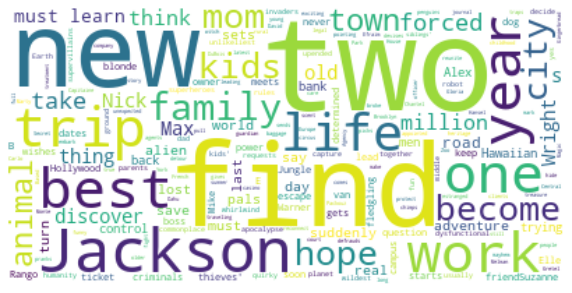

In [9]:
comedy_text = " ".join(overview for overview in comedy_details['overview'])
comedy_wordcloud = WordCloud(background_color="white").generate(comedy_text)
plt.figure(figsize=(10,10))
plt.imshow(comedy_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many more family-oriented words here (mom, kids, family) and it's interesting to note the comparison with drama, where husband and father were the prominent family relationships.

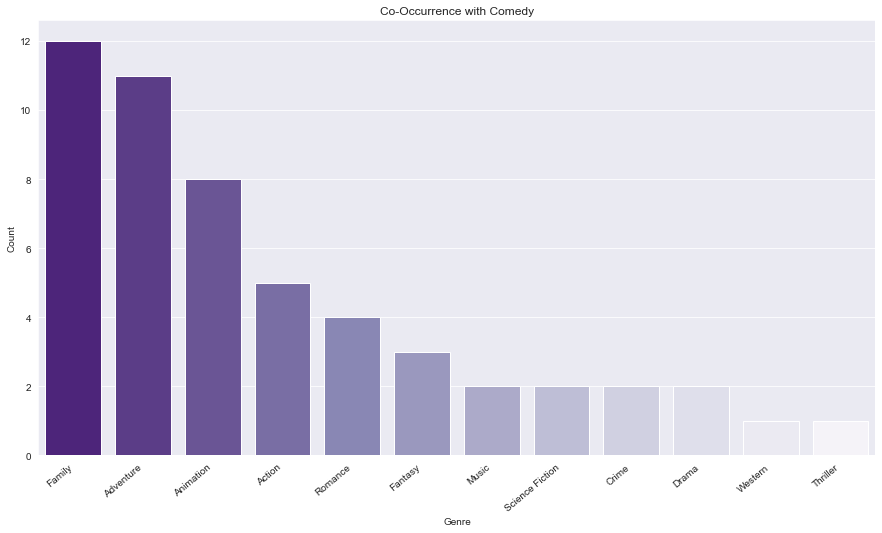

In [10]:
comedy_chart = genre_count(comedy_details['genre_ids_y'], )
comedy_chart = comedy_chart.drop(35)
comedy_chart = comedy_chart.merge(genres, left_index=True, right_on='id')
fig = plt.figure(figsize=(15,8))
plt.title('Co-Occurrence with Comedy')
ax3 = sns.barplot(data=comedy_chart, y=0, x='name', palette = 'Purples_r')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.set(xlabel='Genre', ylabel='Count', title='Co-Occurrence with Comedy');

Looking at the co-occurring genres, it is not surprising to see "family" at the top of the list!

## Thriller

In [11]:
thriller = movie_genres.loc[movie_genres['genre_ids'] == 53]
thriller_details = thriller.merge(df, on='Title')
thriller_details.drop(columns=['genre_ids_x', 'Viewership Score_y', 'id', 'Type', 'title'], inplace=True)
thriller_details.head()

,Title,Viewership Score_x,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date,Netflix Release Date,Days in Top Ten
0,I Care a Lot.,103,"[35, 80, 53]",en,A court-appointed legal guardian defrauds her ...,114.290,6.7,1458,2021-02-19,19-Feb-21,15
1,The Woman in the Window,100,"[80, 9648, 53]",en,An agoraphobic woman living alone in New York ...,179.725,6.2,845,2021-05-14,14-May-21,11
2,Army of the Dead,89,"[28, 27, 53, 80]",en,"Following a zombie outbreak in Las Vegas, a gr...",2488.045,6.6,1430,2021-05-14,21-May-21,10
3,Deadly Illusions,82,"[18, 53]",en,"A bestselling female novelist, suffering from ...",44.376,5.0,186,2021-03-18,18-Mar-21,10
4,Homefront,74,"[28, 53]",en,Phil Broker is a former DEA agent who has gone...,35.055,6.9,2554,2013-11-12,18-Jan-21,12


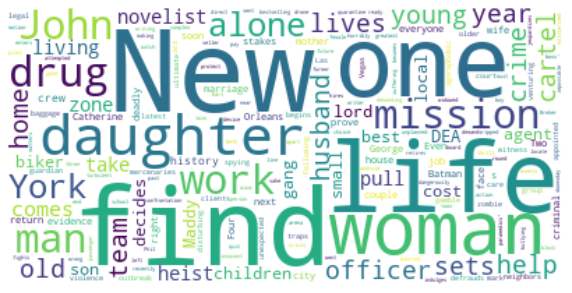

In [12]:
thriller_text = " ".join(overview for overview in thriller_details['overview'])
thriller_wordcloud = WordCloud(background_color="white").generate(thriller_text)
plt.figure(figsize=(10,10))
plt.imshow(thriller_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Compared to the drama wordcloud, drug and crime oriented words seem to be less frequent here (though not absent). "Daughter" and "woman" rise to the top of this analysis.

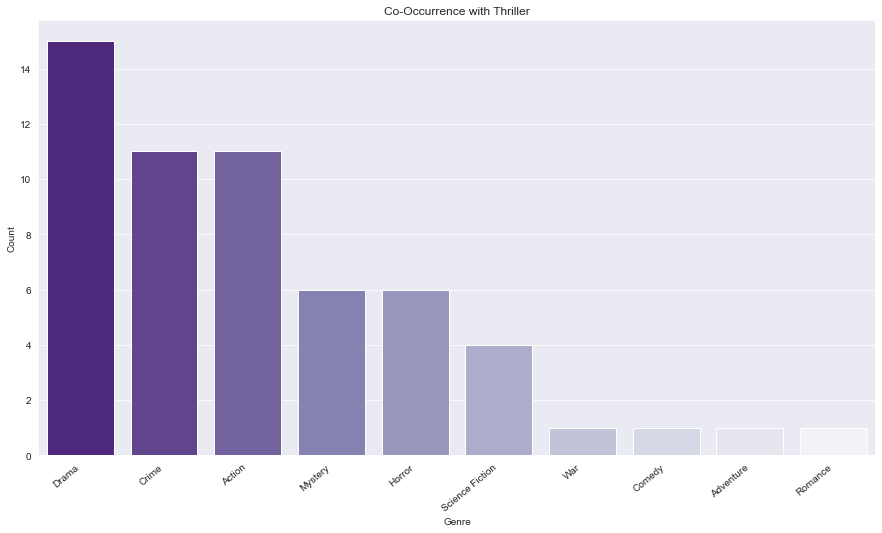

In [13]:
thriller_chart = genre_count(thriller_details['genre_ids_y'], )
thriller_chart = thriller_chart.drop(53)
thriller_chart = thriller_chart.merge(genres, left_index=True, right_on='id')
fig = plt.figure(figsize=(15,8))
ax4 = sns.barplot(data=thriller_chart, y=0, x='name', palette = 'Purples_r')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
ax4.set(xlabel='Genre', ylabel='Count', title='Co-Occurrence with Thriller');

Here we see the same four genres together again--drama, action, thriller, crime. If we look back at our chart of values, we can see that action and crime are the next two most popular genres, which reinforces that this is a potent combo right now.

## Conclusions

Based on this data, my recommendations for Microsoft are:
- **Focus on drama/thriller/crime/action movies.** The combination of these four genres holds a high market share, and it seems a safe bet that people will turn out to see these types of movies.
- **Don't ignore family comedies.** Diversification is important in all areas of business, and movie making is no exception. As the second most popular individual genre, comedies are important.

## Next Steps

- **Netflix only accounts for 20% of the home streaming market.** Further analysis into top titles on other streaming platforms such as Amazon Prime, Hulu, HBO, and Disney+ would increase the amount of data and increase confidence in this analysis